In [1]:
import numpy as np
import matplotlib.pyplot as plt
import confining_potential as con
import parameters as para



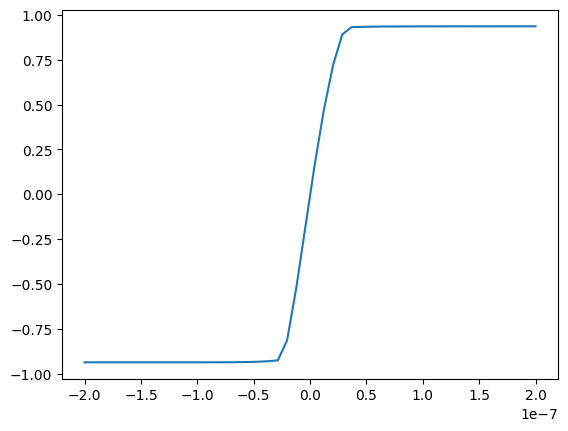

In [17]:
x = np.linspace( -200e-9, 200e-9 )
y = con.interpolation(x, para.fields[199])
plt.plot(x,y)
plt.show()

In [2]:

import os 

fields = para.fields
pot = []
f_name = []


for field in fields:

    if 'Unnamed' not in field:
        f_name.append(field)
        pot.append(eval(field))

pot = sorted(pot)


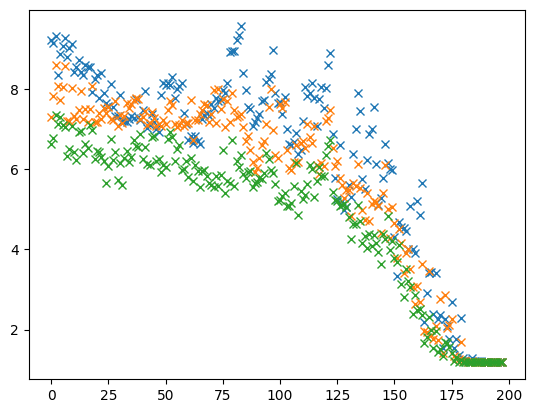

In [6]:
box_array =  np.linspace(-para.x_width, para.x_width, para.m ,endpoint=True)
BO_array = np.linspace(-para.com_width , para.com_width , para.o , endpoint =True)
r_square = np.zeros( [150,150, 15])
for i in range(150):
    for j in range(150):
        r_square[i,j, :] = box_array[i]**2 + box_array[j]**2

x_eh = np.zeros([len(pot), 15])

index = 0
for file in pot:
    energy = np.load('/work/kk472919/hamiltonian1D/energiesData/pot{}.npy'.format(file))
    states = np.load('/work/kk472919/hamiltonian1D/statesData/pot{}.npy'.format(file))
    integral = np.trapz(states**2 , BO_array, axis=2)
    integral = integral * r_square
    integral = np.trapz(integral , box_array, axis=0)
    integral = np.trapz(integral , box_array, axis=0)

    x_eh[index , :] = np.sqrt(integral) *1e9
    index+=1


for i in [0,2 ,4]:

    plt.plot(range(len(pot)), x_eh[:, i] , 'x')

plt.show()


In [13]:
box_array[74]


-1.342281879194636e-10

In [11]:
e_n = np.zeros([len(pot) , 15])
index = 0
for file in pot:
    energy = np.load('/work/kk472919/hamiltonian1D/energiesData/pot{}.npy'.format(file))
    states = np.load('/work/kk472919/hamiltonian1D/statesData/pot{}.npy'.format(file))

    e_n[index , :] = energy

    index+=1

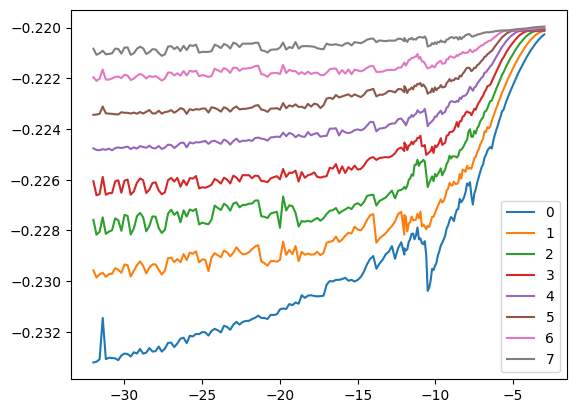

In [15]:
for i in range(8):

    plt.plot(pot, e_n[:, i]/para.joul_to_eV, label = i)


plt.legend()
plt.show()



In [17]:
para.fields.index('-10.5')

186

In [20]:
para.fields[187]

'-10.59375'

-10.6875


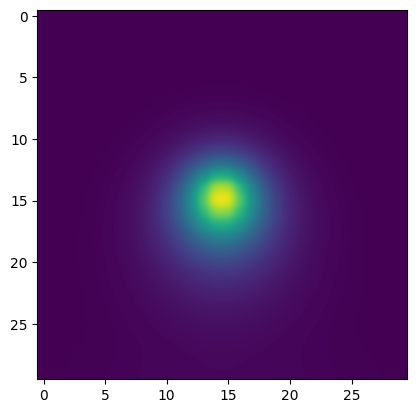

-10.59375


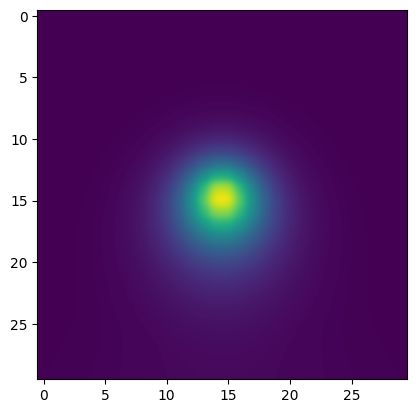

-10.5


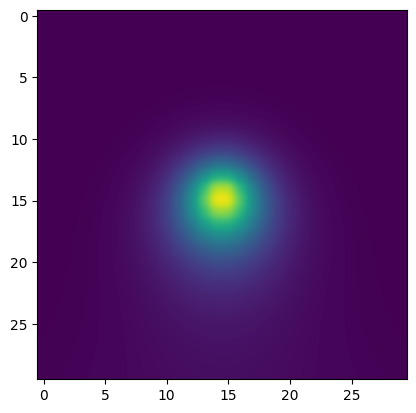

-10.40625


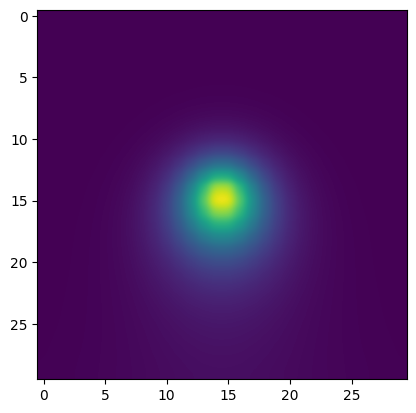

-10.3125


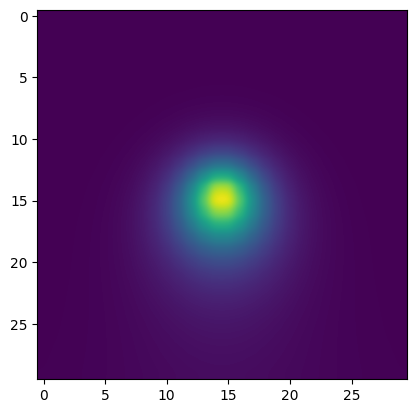

In [10]:
for i in [115, 116 , 117 , 118 , 119]:

    energy = np.load('/work/kk472919/hamiltonian1D/energiesData/pot{}.npy'.format(pot[i]))
    states = np.load('/work/kk472919/hamiltonian1D/statesData/pot{}.npy'.format(pot[i]))
    print(pot[i])
    integral = np.trapz(states, x = np.linspace(-para.com_width, para.com_width, 200, endpoint=True), axis=2 )**2
    plt.imshow(integral[60:90,60:90,0] , interpolation='gaussian')
    plt.show()

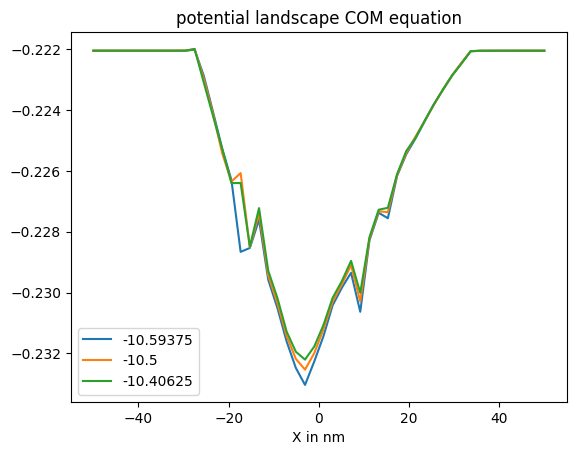

In [3]:
import pos_solver as pos
for i in [ 116, 117 , 118 , 198 ]:
    BO_energy = np.zeros(50)
    BO_array = np.linspace(-para.com_width, para.com_width, 50, endpoint=True)
    for j,x  in enumerate(BO_array):
        BO_energy[j] = np.load('/work/kk472919/hamiltonian1D_2/rel_data/energies/pot{}/com_x{}.npy'.format(pot[i] , x))/para.joul_to_eV
    plt.plot(np.linspace(-para.com_width, para.com_width, 50, endpoint=True)*1e9, BO_energy , label = pot[i])

plt.title('potential landscape COM equation')
plt.xlabel('X in nm')
plt.ylabel('')
plt.legend()
plt.show()



In [7]:
for i in [116,117,118]:
    print(np.load('/work/kk472919/hamiltonian1D_2/energiesData/pot{}.npy'.format(pot[i]))/para.joul_to_eV)
    


[-0.23143143 -0.2292365  -0.22799772 -0.22674692 -0.22557711 -0.2245072
 -0.22327155 -0.22252081 -0.22188055 -0.22160311 -0.22130114 -0.2207325
 -0.22029106 -0.21963579 -0.21901962]
[-0.23113134 -0.22904249 -0.22775073 -0.22638088 -0.22524039 -0.22426947
 -0.22319678 -0.22246265 -0.22180626 -0.22158694 -0.22121341 -0.22066955
 -0.22023998 -0.21952689 -0.21897246]
[-0.23091288 -0.228891   -0.22759706 -0.22629591 -0.22518888 -0.22420189
 -0.2231455  -0.22241485 -0.22179758 -0.22157274 -0.22119313 -0.22064828
 -0.22020864 -0.2195049  -0.21893887]


In [10]:
pot[95:117]

[-13.0,
 -12.8,
 -12.6,
 -12.4,
 -12.2,
 -12.0,
 -12,
 -11.90625,
 -11.8125,
 -11.71875,
 -11.625,
 -11.53125,
 -11.4375,
 -11.34375,
 -11.25,
 -11.15625,
 -11.0625,
 -10.96875,
 -10.875,
 -10.78125,
 -10.6875,
 -10.59375]

In [6]:
states.shape

(150, 150, 200, 15)

In [18]:
plt.figure(figsize=(12,8), dpi=80)

<Figure size 960x640 with 0 Axes>

<Figure size 960x640 with 0 Axes>

In [19]:

for i in [115, 116 , 117 , 118 , 119]:

    energy = np.load('/work/kk472919/hamiltonian1D/energiesData/pot{}.npy'.format(pot[i]))
    states = np.load('/work/kk472919/hamiltonian1D/statesData/pot{}.npy'.format(pot[i]))
    integral = np.trapz(states, x = np.linspace(-para.com_width, para.com_width, para.o) )**2
    for j in [1,3,5]:
        plt.plot(BO_array, states[int(para.m/2) , int(para.m/2) , : , j] , label = j)
    plt.legend()

    plt.show()

ValueError: operands could not be broadcast together with shapes (1,1,1,299) (150,150,200,14) 

In [14]:
pot[117]

-10.5

In [20]:
localisation = [0, 1, 2, 3]
box_array =  np.linspace(-para.x_width, para.x_width, para.m ,endpoint=True)
BO_array = np.linspace(-para.com_width , para.com_width , para.o , endpoint =True)
for i in [115, 116 , 117 , 118 , 119 ]:
    

    energy = np.load('/work/kk472919/hamiltonian1D/energiesData/pot{}.npy'.format(pot[i]))/para.joul_to_eV
    states = np.load('/work/kk472919/hamiltonian1D/statesData/pot{}.npy'.format(pot[i]))
    k_l_square = np.trapz(states[int(para.m/2), int(para.n/2), :, :], BO_array, axis = 0)**2
    plt.plot( energy[:8] , k_l_square[:8] , 'x')

    plt.show()





ValueError: operands could not be broadcast together with shapes (299,1) (199,15) 

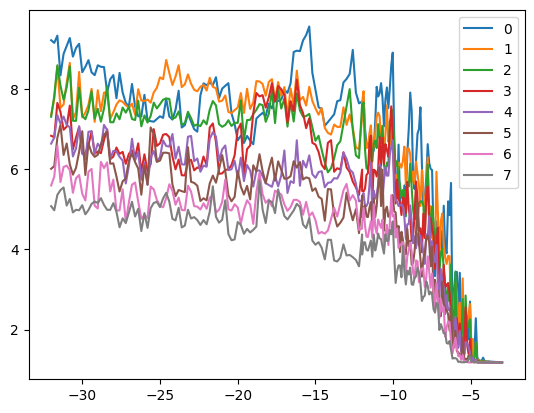

In [10]:
for i in range(8):

    plt.plot(pot, x_eh[:, i]  , label = i)

plt.legend()

plt.show()

In [ ]:
ß

In [22]:
len(f_name)

198

In [ ]:
for file in f_name:

    energy = np.load('work/kk472919/hamiltonian1D/energiesData/pot{}.npy'.format(file))
    states = np.load('work/kk472919/hamiltonian1D/statesData/pot{}.npy'.format(file))


In [4]:
import plot as p

In [5]:
h_bar = p.h_bar_omega()

In [18]:
print(para.fields)

['Unnamed: 0.4', 'Unnamed: 0', '-3', '-3.09375', '-3.1875', '-3.28125', '-3.375', '-3.46875', '-3.5625', '-3.65625', '-3.75', '-3.84375', '-3.9375', '-4.03125', '-4.125', '-4.21875', '-4.3125', '-4.40625', '-4.5', '-4.59375', '-4.6875', '-4.78125', '-4.875', '-4.96875', '-5.0625', '-5.15625', '-5.25', '-5.34375', '-5.4375', '-5.53125', '-5.625', '-5.71875', '-5.8125', '-5.90625', 'Unnamed: 0.1', '-12.0', '-12.2', '-12.4', '-12.6', '-12.8', '-13.0', '-13.2', '-13.4', '-13.6', '-13.8', '-14.0', '-14.2', '-14.4', '-14.6', '-14.8', '-15.0', '-15.2', '-15.4', '-15.6', '-15.8', '-16.0', '-16.2', '-16.4', '-16.6', '-16.8', '-17.0', '-17.2', '-17.4', '-17.6', '-17.8', '-18.0', '-18.2', '-18.4', '-18.6', '-18.8', '-19.0', '-19.2', '-19.4', '-19.6', '-19.8', '-20.0', '-20.200000000000003', '-20.4', '-20.6', '-20.8', '-21.0', '-21.200000000000003', '-21.4', '-21.6', '-21.8', '-22.0', '-22.200000000000003', '-22.4', '-22.6', '-22.8', '-23.0', '-23.200000000000003', '-23.4', '-23.6', '-23.8', '-24.